In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_color_codes("pastel")

In [2]:
# Importing the formatted dataset

df = pd.read_csv(r"formatted_dataset_1.csv")

In [3]:
df.head()

,Unnamed: 0,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,...,Violation County,Vehicle Color,Vehicle Year,State,Issue_month_year,Issue_year,new_violation_time_AP,Description,VIOLATION DESCRIPTION,Fine Amount
0,0,1452758967,T753575C,NY,OMT,2019-01-01,71,SDN,TOYOT,P,...,Queens,BLK,2016,New York,January-2019,2019,01:50PM,Taxi & Limousine Commission,INSP. STICKER-EXPIRED/MISSING,65.0
1,1,1460097804,JMU9251,NY,PAS,2019-01-01,70,SDN,HONDA,P,...,Queens,GY,2010,New York,January-2019,2019,07:00AM,Passenger,REG. STICKER-EXPIRED/MISSING,65.0
2,2,1464592822,31328WG,NY,COM,2019-01-02,14,DELV,FRUEH,P,...,Manhattan,WHITE,2004,New York,January-2019,2019,04:32PM,Commercial Vehicles,NO STANDING-DAY/TIME LIMITS,115.0
3,3,1464592810,63422JM,NY,COM,2019-01-02,14,DELV,INTER,P,...,Manhattan,BROWN,1998,New York,January-2019,2019,05:48PM,Commercial Vehicles,NO STANDING-DAY/TIME LIMITS,115.0
4,4,1464592809,48799JU,NY,COM,2019-01-02,14,VAN,DODGE,P,...,Manhattan,WHITE,2005,New York,January-2019,2019,05:55PM,Commercial Vehicles,NO STANDING-DAY/TIME LIMITS,115.0


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.shape

(23426275, 22)

In [6]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Violation Precinct', 'Issuer Precinct',
       'Violation Time', 'Violation County', 'Vehicle Color', 'Vehicle Year',
       'State', 'Issue_month_year', 'Issue_year', 'new_violation_time_AP',
       'Description', 'VIOLATION DESCRIPTION', 'Fine Amount'],
      dtype='object')

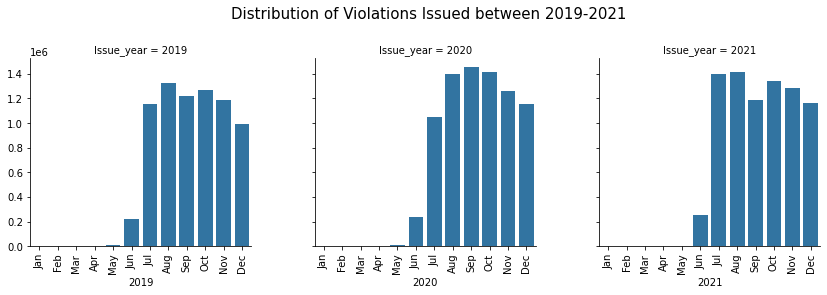

In [7]:
#chart created by Princestar D.

plt.rcParams["figure.figsize"] = (10,8)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
g = sns.FacetGrid(df, col='Issue_year', sharex=False, height=4, aspect=1, sharey=True)
g.map(sns.countplot,'Issue_month_year')
g.set_xticklabels(months ,rotation=90)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of Violations Issued between 2019-2021',size=15)
g.axes[0,0].set_xlabel('2019')
g.axes[0,1].set_xlabel('2020')
g.axes[0,2].set_xlabel('2021')
plt.show()

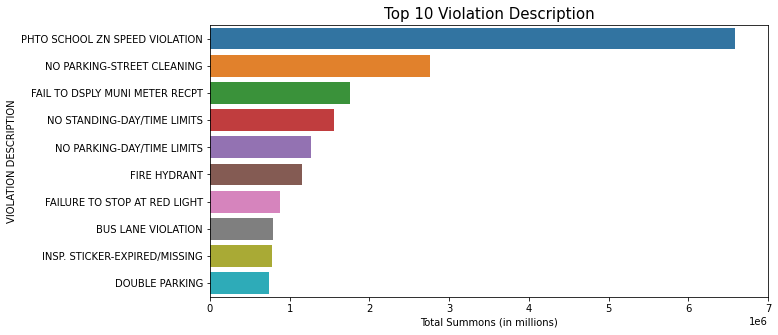

In [8]:
### chart created by Princestar D.

plt.figure(figsize=(10,5))
top_10_violations = df.loc[:,['VIOLATION DESCRIPTION','Summons Number']].groupby(['VIOLATION DESCRIPTION']).count()['Summons Number'].reset_index().sort_values('Summons Number',ascending = False).head(10)

# Bar plot
sns.barplot(x = 'Summons Number', y = 'VIOLATION DESCRIPTION', data = top_10_violations)
plt.xlabel('Total Summons (in millions)')
plt.title('Top 10 Violation Description',size=15)
plt.xlim(0,7000000)
plt.show()

#chart created by 

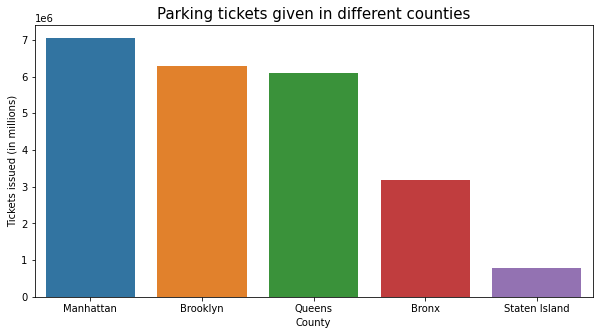

In [9]:
### chart created by Princestar D. 

#No of violations based on counties
violation_county = df['Violation County'].value_counts()
plt.figure(figsize=(10,5))
plt.ylabel('Tickets issued (in millions)')
plt.xlabel('County')
plt.title('Parking tickets given in different counties',size=15)
f = sns.barplot(y=violation_county.values, x=violation_county.index)
plt.show()


In [10]:
# Count the number of parking violations in each county.
df_county = df.groupby('Violation County')['Summons Number'].count().reset_index(name='Percentage')

# Calculate the number of parking violations in each county as a percentage of all parking violations.
df_county['Percentage'] = df_county['Percentage'] / df_county['Percentage'].sum() * 100

# Sort and display the resulting dataframe.
violation_percentage = df_county.sort_values(by='Percentage', ascending=False).reset_index(drop=True)
violation_percentage

,Violation County,Percentage
0,Manhattan,30.103382
1,Brooklyn,26.892171
2,Queens,26.062774
3,Bronx,13.602116
4,Staten Island,3.339558


In [12]:
max_issues = df.groupby('Issuing Agency')['Summons Number'].count().nlargest(10).reset_index(name='Count')
max_issues

,Issuing Agency,Count
0,T,13898095
1,V,8341306
2,S,586999
3,P,529491
4,X,43349
5,K,20801
6,F,1243
7,A,1053
8,R,959
9,H,619


Here we can see that the Issuing Agencies T, V, S and P have the amount of tickets under them. The highest being T with 13,898,095 tickets issued and H being the lowest with 619 tickets issued.

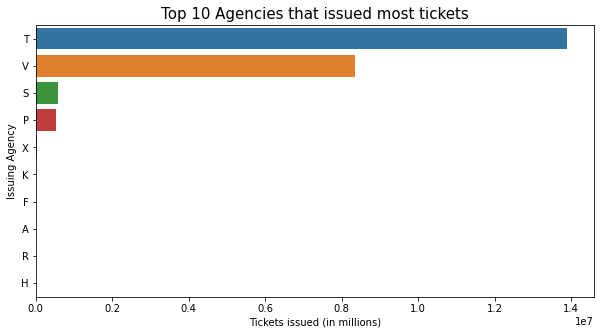

In [13]:
### chart created by Rohan M.

fig, ax = plt.subplots(figsize=(10,5))
top_10_issuing_agencies = df.loc[:,['Issuing Agency','Summons Number']].groupby(['Issuing Agency']).count()['Summons Number'].reset_index().sort_values('Summons Number',ascending = False).head(10)
sns.barplot(x = 'Summons Number', y = 'Issuing Agency', data = top_10_issuing_agencies)
plt.title("Top 10 Agencies that issued most tickets",size=15)
plt.xlabel('Tickets issued (in millions)')
plt.show()

In [14]:
Top_10_Car_Brands = df.groupby('Vehicle Make')['Summons Number'].count().nlargest(10).reset_index(name='Count')
Top_10_Car_Brands

,Vehicle Make,Count
0,HONDA,2732124
1,TOYOT,2578605
2,FORD,2357115
3,NISSA,2079694
4,CHEVR,1306147
5,ME/BE,1071240
6,BMW,1046392
7,JEEP,972272
8,DODGE,835231
9,FRUEH,800719


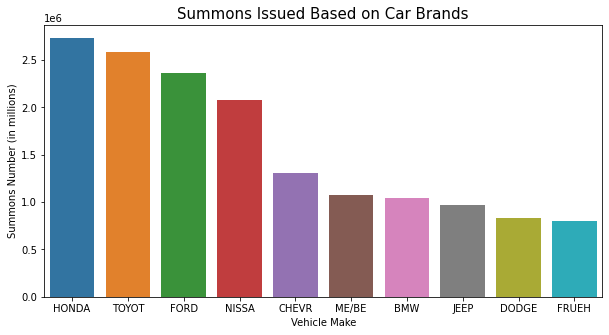

In [15]:
### chart created by Rohan M.

plt.figure(figsize=(10,5))
top_10_VehicleMake = df.loc[:,['Vehicle Make','Summons Number']].groupby(['Vehicle Make']).count()['Summons Number'].reset_index().sort_values('Summons Number',ascending = False).head(10)
sns.barplot(x = 'Vehicle Make', y = 'Summons Number', data = top_10_VehicleMake)
plt.title("Summons Issued Based on Car Brands",size=15)
plt.ylabel('Summons Number (in millions)')
plt.show()


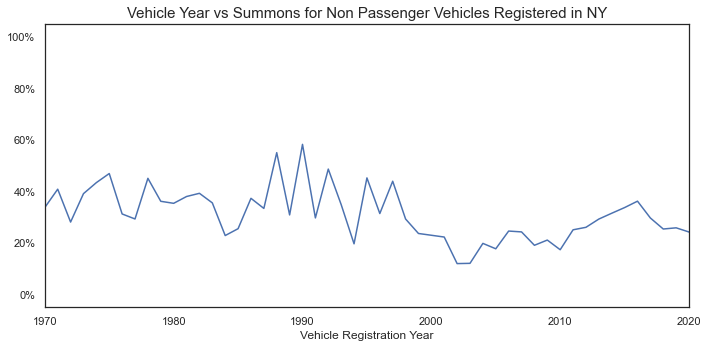

In [30]:
### chart created by Rohan M. 

plt.figure(figsize=(10,5))
# Subset for only rows where the Registration State is NY.
df_ny = df[df['Registration State'] == 'NY']

# Calculate the ratio of non-passenger plates to all plates, grouped by year. 
df_ny_notpas = df_ny[df_ny['Plate Type'] != 'PAS'].groupby('Vehicle Year')['Summons Number'].count()
df_ny_all = df_ny.groupby('Vehicle Year')['Summons Number'].count()
ratio = df_ny_notpas / df_ny_all
plt.xlim(1970, 2020)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.xlabel('Vehicle Registration Year')

# Replace nulls with 0.
ratio.fillna(0, inplace = True)

# Create and show plot.
plt.title('Vehicle Year vs Summons for Non Passenger Vehicles Registered in NY',size=15)
plt.plot(ratio)
plt.show()


For all Non Passenger Vehicles registered in New York, if purchased before the year 2000 has a 40-60% chance of getting a ticket compared to 15-35% if purchased after the year 2000.

#### Are newer cars more likely to get parking tickets?

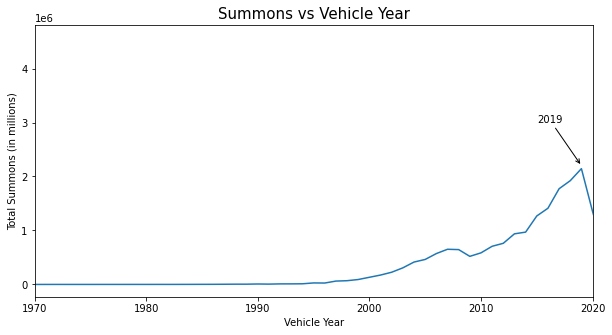

In [16]:
### chart created by Princestar D.

plt.figure(figsize=(10,5))
vy_plot = df.groupby(['Vehicle Year']).count()['Summons Number'].sort_values(ascending=False).reset_index()
vy = sns.lineplot(x = 'Vehicle Year', y = 'Summons Number', data = vy_plot)
plt.ylabel('Total Summons (in millions)')
plt.title('Summons vs Vehicle Year',size=15)
plt.xlim(1970, 2020)

# add annotation
plt.annotate(xy=[2019, 2200000], xytext=[2015, 3000000], text='2019', arrowprops=dict(arrowstyle= '->',
                         color='black'))
plt.show()


Based on Vehicle year data, We can see that with newer vehicles there is a rise in total summons issued by DMV.

In [17]:
max_issues = df.groupby('Issue Date')['Summons Number'].count().nlargest(10).reset_index(name='Count')
max_issues

,Issue Date,Count
0,2020-11-27,70859
1,2020-08-20,69591
2,2020-09-04,69117
3,2021-11-26,68600
4,2020-10-15,68591
5,2021-07-15,68518
6,2020-09-17,68472
7,2020-09-03,68454
8,2020-09-18,68351
9,2020-08-21,68188


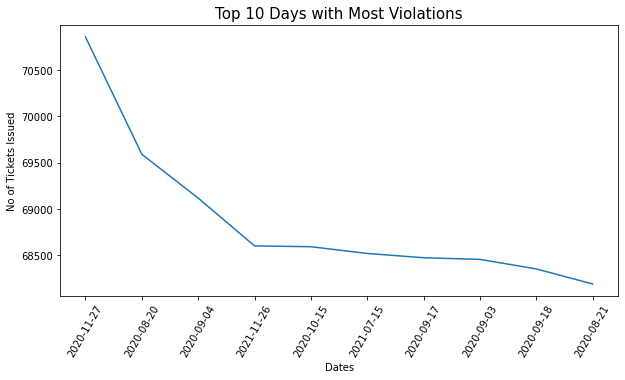

In [18]:
### chart created by Princestar D.

plt.figure(figsize=(10,5))
mv = sns.lineplot(x= 'Issue Date', y='Count', data=max_issues)
plt.title("Top 10 Days with Most Violations",size=15)
plt.xlabel('Dates')
plt.ylabel('No of Tickets Issued')
mv.tick_params(axis='x', rotation=60)
plt.show()

### In State vs Out of State

In [19]:
df['State_Marker'] = np.where(df['State'] == 'New York', 'New York State', 'Out of State')

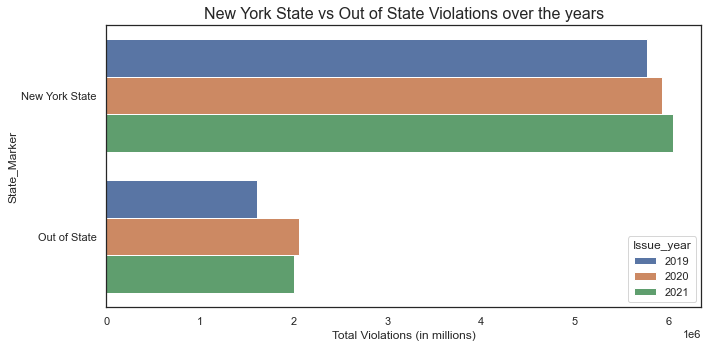

In [28]:
### chart created by Neelam S. 

# In-State vs Out of State Violations through the years - Horizontal Bar Plo
  
sns.set(style='white')
sns.set_color_codes("pastel")
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.title('New York State vs Out of State Violations over the years', fontsize=16)

# perform groupby
test_df = df.groupby(['State_Marker', 'Issue_year']).agg(Violation_count=("Summons Number", 'count'))
test_df = test_df.reset_index()


# plot barplot
ax = sns.barplot(x="Violation_count",
           y="State_Marker",
           hue='Issue_year',
           data=test_df,errwidth=0)
plt.xlabel('Total Violations (in millions)')
plt.show()

In [21]:
df_grouped = df.groupby(['Issue_year', 'Description'])['Summons Number'].agg(['count'])
df_grouped.reset_index(inplace=True)
df_19 = df_grouped[df_grouped['Issue_year'] == 2019]
df_19 = df_19.nlargest(n=10,columns= ['count'])
df_20 = df_grouped[df_grouped['Issue_year'] == 2020]
df_20 = df_20.nlargest(n=10,columns= ['count'])
df_21 = df_grouped[df_grouped['Issue_year'] == 2021]
df_21 = df_21.nlargest(n=10,columns= ['count'])
df_combined = df_19.append(df_20)
df_combined = df_combined.append(df_21)
#df_combined.to_csv('stacked-inter-out.csv')

In [22]:
df_bar_stack = pd.read_csv(r'stacked-inter-out.csv')
df_bar_stack.head()

,Issue_year,Passenger,Commercial Vehicles,Taxi & Limousine Commission,Personalized Plates,Motorcycles
0,2019,5513944,1180187,326017,70332,20396
1,2020,6444055,937479,258100,78236,24129
2,2021,6621037,792944,252464,90452,22228


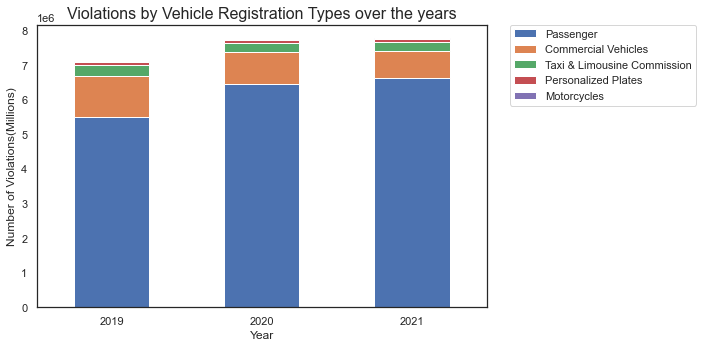

In [23]:
### chart created by Neelam S. 

#set seaborn plotting aesthetics
sns.set(style='white')
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

#create stacked bar chart
#df_bar_stack.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
df_bar_stack.set_index('Issue_year').plot(kind='bar', stacked=True)
#add overall title
plt.title('Violations by Vehicle Registration Types over the years', fontsize=16)

#add axis titles
plt.xlabel('Year')
plt.ylabel('Number of Violations(Millions)')
#plt.legend( loc="lower right", frameon=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#rotate x-axis labels
plt.xticks(rotation=0)
plt.show()

In [27]:
# Repeat Offenders
df_grouped  = df.groupby(['Issue_year','State_Marker', 'Plate ID']).agg(Repeat_Offense_count=("Summons Number", 'count'))
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped[df_grouped['Repeat_Offense_count'] > 1]
df_grouped.head()

,Issue_year,State_Marker,Plate ID,Repeat_Offense_count
7,2019,New York State,0010TXB,2
11,2019,New York State,001NYC,3
15,2019,New York State,0021TWD,2
19,2019,New York State,00235577,2
37,2019,New York State,0040PDD,2


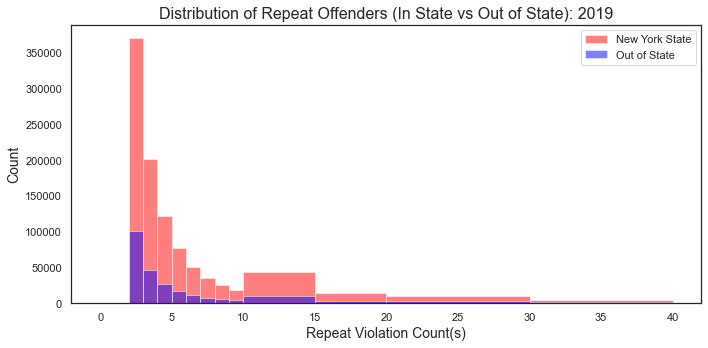

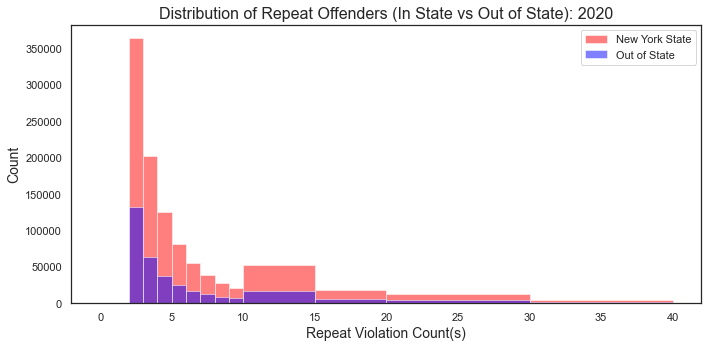

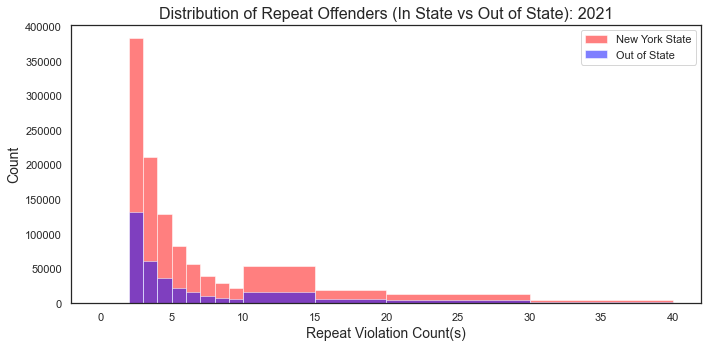

In [26]:
# chart created by Neelam S.

year = [2019,2020,2021]

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True


for i in year:

    test_df = df_grouped[(df_grouped['Issue_year'] == i) & (df_grouped['State_Marker'] == 'New York State') ]
    plt.hist(test_df['Repeat_Offense_count'], bins=[0,1,2,3,4,5,6,7,8,9,10,15,20,30,40], alpha=0.5, label="New York State", color = 'Red')
    test_df = df_grouped[(df_grouped['Issue_year'] == i) & (df_grouped['State_Marker'] == 'Out of State') ]
    plt.hist(test_df['Repeat_Offense_count'], bins=[0,1,2,3,4,5,6,7,8,9,10,15,20,30,40], alpha=0.5, label="Out of State" ,color = 'Blue')
    plt.legend(loc='upper right')
    plt.xlabel("Repeat Violation Count(s)", size=14)
    plt.ylabel("Count", size=14)
    plt.title("Distribution of Repeat Offenders (In State vs Out of State): " + str(i), fontsize=16)
    plt.show()
    
